# Projet Python pour le data scientist : Prévision des prix des Airbnb
#### Réalisé par M.Blazevic, E.Bordais, C.Nadler, C.Voisin

## 0. Import modules et base de données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from string import ascii_letters


In [2]:
# data = pd.read_csv('/Users/eleabordais/Documents/ENSAE/2A ENSAE/Python/Projet python/airbnb-listings3.csv' , sep=';')
# data
data = pd.read_csv('/Users/come/Desktop/ENSAE/Cours/Projet_python/airbnb-listings3.csv' , sep=';')
data

/var/folders/43/knrnkf8s5bbgp_jnfjz_5wbh0000gn/T/ipykernel_37927/2832064474.py:3: DtypeWarning: Columns (40,82) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/come/Desktop/ENSAE/Cours/Projet_python/airbnb-listings3.csv' , sep=';')


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,7713011,https://www.airbnb.com/rooms/7713011,20170404145355,2017-04-06,STUDIO PIGALLE W BALCONY,"In the heart of Montmarte Pigalle, this lovely...",This newly refurbished flat is ideal for a cou...,"In the heart of Montmarte Pigalle, this lovely...",none,It is central enough for you to walk your way ...,...,9.0,8.0,9.0,NaN,Paris,strict,7,1.84,"48.88292573377615,2.3358125139068453","Host Has Profile Pic,Host Identity Verified,Is..."
1,3335054,https://www.airbnb.com/rooms/3335054,20170404145355,2017-04-05,Montmartre au pied du Sacré-Coeur !,"Ce studio de 22m2, rénové et équipé avec soin,...",A studio where it is very pleasant to settle i...,A studio where it is very pleasant to settle i...,none,The apartment is located rue d'Orsel just belo...,...,10.0,10.0,10.0,NaN,Paris,moderate,1,0.03,"48.88301302713629,2.343468625865973","Host Has Profile Pic,Host Identity Verified,Is..."
2,10066518,https://www.airbnb.com/rooms/10066518,20170404145355,2017-04-06,LOVELY FLAT MONTMARTRE SACRE COEUR,In 2' by walk of the Sacré-Coeur and the Mouli...,Charmant appartement typiquement parisien avec...,In 2' by walk of the Sacré-Coeur and the Mouli...,none,"Situé en plein quartier Montmartre, vous serez...",...,10.0,10.0,10.0,NaN,Paris,moderate,2,0.89,"48.884043258037266,2.3406044314802927","Host Has Profile Pic,Host Identity Verified,Is..."
3,8100080,https://www.airbnb.com/rooms/8100080,20170404145355,2017-04-06,Appartement au pied de Montmartre,"Dans un appartement de 50m², à deux minutes du...",NaN,"Dans un appartement de 50m², à deux minutes du...",none,NaN,...,10.0,10.0,9.0,NaN,Paris,flexible,1,0.17,"48.88519518071742,2.3451007362886185","Host Has Profile Pic,Host Identity Verified,Is..."
4,7397323,https://www.airbnb.com/rooms/7397323,20170404145355,2017-04-06,Beautiful and Spacious Studio,Grd studio lumineux de 32m² avec une grande pi...,NaN,Grd studio lumineux de 32m² avec une grande pi...,none,NaN,...,10.0,8.0,10.0,NaN,Paris,flexible,1,0.11,"48.89480043872107,2.3300554723388434",Host Has Profile Pic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54508,2610162,https://www.airbnb.com/rooms/2610162,20170404145355,2017-04-06,Rue Cler at 500m from Eiffel Tower!,"Logement très calme, ensoleillé, situé derrièr...",Ce logement se trouve au 2e étage et comporte ...,"Logement très calme, ensoleillé, situé derrièr...",none,"Quartier ""vivant"" aussi bien de jour comme de ...",...,9.0,10.0,9.0,NaN,Paris,moderate,1,1.06,"48.858121148036595,2.3060024345958587","Host Has Profile Pic,Host Identity Verified,Is..."
54509,13760682,https://www.airbnb.com/rooms/13760682,20170404145355,2017-04-06,Elegant 160m Home in the heart of St Germain,Our home is in the heart to Saint-Germain-des-...,Our home is a large (160m) classic French apar...,Our home is in the heart to Saint-Germain-des-...,none,St Germain des Pres is the heart of left bank ...,...,10.0,10.0,9.0,NaN,Paris,strict,2,0.56,"48.85289626976821,2.3256957697321123","Host Has Profile Pic,Host Identity Verified,Is..."
54510,9173969,https://www.airbnb.com/rooms/9173969,20170404145355,2017-04-06,partner service test listing3,this is a test summary,NaN,this is a test summary,none,NaN,...,NaN,NaN,NaN,NaN,Paris,flexible,1,NaN,"48.8528110291481,2.3248405116672988","Host Has Profile Pic,Is Location Exact"
54511,13754942,https://www.airbnb.com/rooms/13754942,20170404145355,2017-04-06,2 bedroom appartement in a premium area,Situated in a prestigious area near the Rodin ...,NaN,Situated in a prestigious area near the Rodin ...,none,Premium neighborhoods with many wonderful cafe...,...,10.0,10.0,10.0,NaN,Paris,strict,1,0.34,"48.858549434544635,2.3167999983004584","Host Has Profil

On supprime les features qui ne sont pas utiles

In [3]:
df = data.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Summary', 
              'Experiences Offered', 'Thumbnail Url', 'House Rules', 'Medium Url',
              'Picture Url', 'XL Picture Url', 'Host URL', 'Host Location', 
              'Host About', 'Host Acceptance Rate', 'Host Thumbnail Url', 
              'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count',
               'Host Verifications','Neighbourhood Group Cleansed', 'State', 
                'Market', 'Smart Location', 'Country Code', 'Country', 
               'Calendar last Scraped', 'First Review', 'Last Review', 
                'Jurisdiction Names', 'Features', 'License', 'Interaction', 'Host Name',
                'Monthly Price', 'Weekly Price'
               ], axis=1)

In [4]:
df.head()

,Name,Space,Description,Neighborhood Overview,Notes,Transit,Access,Host ID,Host Since,Host Response Time,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,STUDIO PIGALLE W BALCONY,This newly refurbished flat is ideal for a cou...,"In the heart of Montmarte Pigalle, this lovely...",It is central enough for you to walk your way ...,"Real globetrotters, we are real Parisians with...",The flat is ideally located in Montmartre Piga...,"Subway stations: Abbesses or Pigalle. Bus, Tax...",32492446,2015-05-03,within an hour,...,9.0,9.0,9.0,9.0,8.0,9.0,strict,7,1.84,"48.88292573377615,2.3358125139068453"
1,Montmartre au pied du Sacré-Coeur !,A studio where it is very pleasant to settle i...,A studio where it is very pleasant to settle i...,The apartment is located rue d'Orsel just belo...,The building has a digital code and intercom. ...,The studio is easily accessible. At the foot o...,"The kitchen is equipped with a refrigerator, t...",2726446,2012-06-24,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1,0.03,"48.88301302713629,2.343468625865973"
2,LOVELY FLAT MONTMARTRE SACRE COEUR,Charmant appartement typiquement parisien avec...,In 2' by walk of the Sacré-Coeur and the Mouli...,"Situé en plein quartier Montmartre, vous serez...","Situé en plein quartier Montmartre, vous serez...",Très bien desservi par les transports en commu...,NaN,30432969,2015-04-01,within a few hours,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2,0.89,"48.884043258037266,2.3406044314802927"
3,Appartement au pied de Montmartre,NaN,"Dans un appartement de 50m², à deux minutes du...",NaN,NaN,NaN,NaN,42773335,2015-08-28,within a few hours,...,10.0,10.0,10.0,10.0,10.0,9.0,flexible,1,0.17,"48.88519518071742,2.3451007362886185"
4,Beautiful and Spacious Studio,NaN,Grd studio lumineux de 32m² avec une grande pi...,NaN,NaN,NaN,NaN,38757332,2015-07-17,within an hour,...,10.0,9.0,9.0,10.0,8.0,10.0,flexible,1,0.11,"48.89480043872107,2.3300554723388434"


on a donc maintenant 55 features

In [5]:
df.columns

Index(['Name', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Host ID', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Total Listings Count', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count',

## 1. Statistiques descriptives de la base de données 

### 1.0 Premières statistiques

In [6]:
#on abandonne les colonnes où les prix sont nuls pour éviter de fausser l'analyse
df=df[df['Price']!=0]

In [7]:
df['Price'].describe()

count    54458.000000
mean        94.789159
std         73.357259
min          8.000000
25%         55.000000
50%         75.000000
75%        107.000000
max        999.000000
Name: Price, dtype: float64

Commentaire : prix moyen de 94€ (prix min de 8€ étrange) 

In [8]:
#Traçons la répartition des prix des Airbnb Parisiens

Text(0, 0.5, 'Quantité')

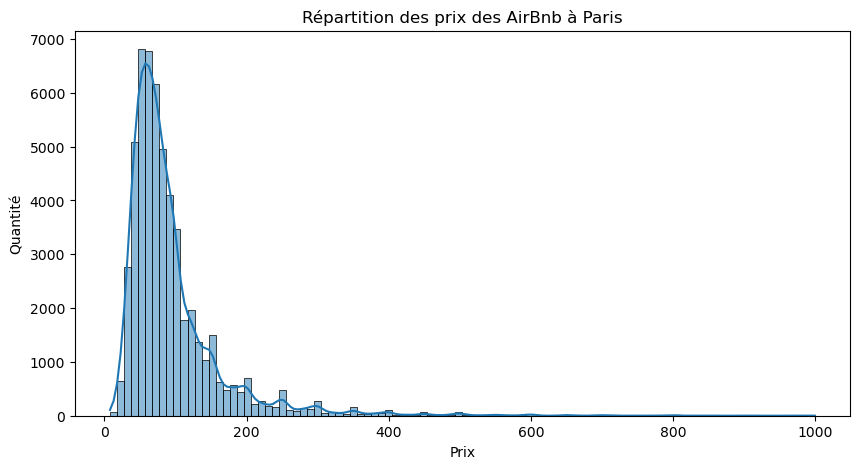

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df['Price'], kde=True, bins=int(100))
plt.title ('Répartition des prix des AirBnb à Paris')
plt.xlabel('Prix')
plt.ylabel('Quantité')

In [10]:
#Pourcentage des airbnb ayant un prix inférieur à 200€
len(df.loc[df['Price']<200])/len(df) * 100

93.09142941003815

Commentaire : la plus grande partie des AirBnb ont un prix inférieur à 200€ la nuit. 

Question : qu'est ce qui influence le plus le prix d'un airbnb ? plusieurs axes 
- sa taille : nb de chambres, de personnes qu'il peut accueillir, mètre carré
- sa localisation : quartier 
- qualité de l'hébergement : matériels et service disponible
- qualité de l'hôte


##### Quelles sont les variables les plus corrélées au prix ?

In [11]:
#on ne garde que les variables de type numériques
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Host ID,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,32492446,100.0,7.0,48.882926,2.335813,2,1.0,0.0,1.0,NaN,...,37,85.0,9.0,9.0,9.0,9.0,8.0,9.0,7,1.84
1,2726446,NaN,1.0,48.883013,2.343469,2,1.0,0.0,1.0,NaN,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.03
2,30432969,95.0,2.0,48.884043,2.340604,2,1.0,1.0,1.0,NaN,...,13,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0.89
3,42773335,100.0,1.0,48.885195,2.345101,2,1.0,1.0,1.0,NaN,...,3,87.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0.17
4,38757332,100.0,1.0,48.894800,2.330055,2,1.0,0.0,1.0,NaN,...,2,90.0,10.0,9.0,9.0,10.0,8.0,10.0,1,0.11


<AxesSubplot:>

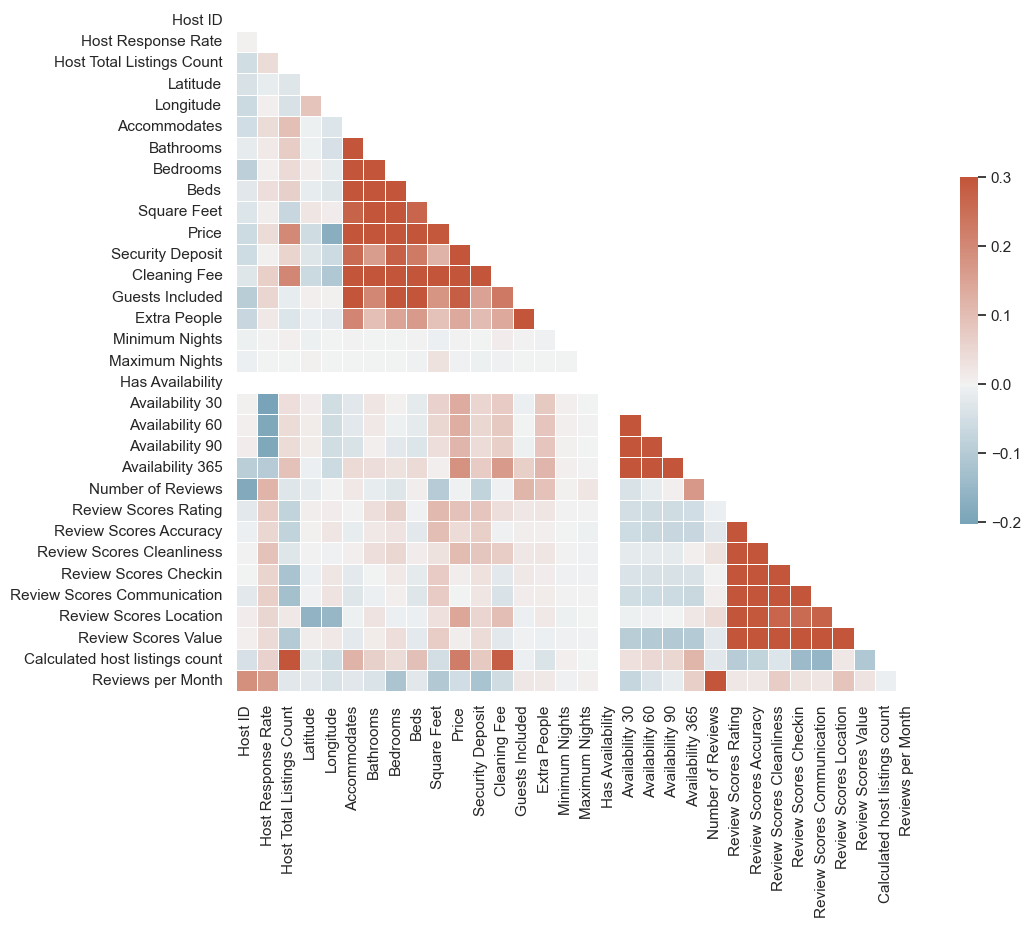

In [12]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
#Variables numériques le splus corrélées avec le prix

var_corr = df_num.corr()['Price']
var = var_corr[abs(var_corr) > 0.4].sort_values(ascending=False)
print("Voici les {} variables les plus fortement corrélées avec le prix par nuit:\n{}".format(len(var), var))

Voici les 6 variables les plus fortement corrélées avec le prix par nuit:
Price           1.000000
Cleaning Fee    0.606410
Accommodates    0.578680
Bedrooms        0.548549
Beds            0.506751
Bathrooms       0.465715
Name: Price, dtype: float64


### 1.1 Influence de la localisation géographique

In [14]:
df.columns

Index(['Name', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Host ID', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Total Listings Count', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count',

Après une rapide analyse, on se rend compte que la variable Neighborhood Cleansed est moins précise que Neighborhood
(20 valeurs contre 64) mais elle semble éliminer certaines erreurs et doublons (exemple quartier Cannesqui n'existent pas, le 15 arrondissement qui groupe avec d'autre quartier). On utilisera donc cette variable là. 

In [15]:
df['Neighbourhood Cleansed'].describe()

count                 54512
unique                   20
top       Buttes-Montmartre
freq                   6315
Name: Neighbourhood Cleansed, dtype: object

In [16]:
#On sort le tableau qui indique le nombre et le prix moyen des Airbnb par quartiers
df_nb = df.groupby('Neighbourhood Cleansed').agg({'Neighbourhood Cleansed':'count', 'Price':'mean'})
df_nb.columns = ['count', 'mean_price']
df_nb.reset_index(inplace=True)
df_nb.sort_values('count', ascending=False, ignore_index=True, inplace=True)

In [17]:
df_nb

,Neighbourhood Cleansed,count,mean_price
0,Buttes-Montmartre,6315,74.813243
1,Popincourt,5381,79.487546
2,Vaugirard,4000,90.633567
3,Entrepôt,3749,82.779616
4,Batignolles-Monceau,3547,88.391819
5,Ménilmontant,2981,65.175444
6,Buttes-Chaumont,2951,66.420285
7,Passy,2895,123.859570
8,Opéra,2391,98.421757
9,Temple,2368,120.041807


Commentaire : On s'aperçoit donc que, logiquement, les prix varient fortement entre les différentes quartiers de Paris. On s'interesse désormais au prix par arrondissement, pour ensuite faire de la visualisation sur carte. 

In [18]:
#Toutes les valeurs prises par la variable Zipcode
df['Zipcode'].unique()

array(['75018', '75004', '75003', '75017', nan, '75019', '75020', '75007',
       '75015', '75006', '75010', '75009', '93300', '75012', '75011',
       '75008', '75013', '75005', '75002', '75001', '75014', '75116',
       '75016', '750018', '92130', '75', '75011\n75011', 'Paris 75004',
       '92300', '75000', '94250', '94160', '76016', '75011 PARIS',
       '92100', '750109', '7015', 75116.0, 75016.0, 75018.0, 75004.0,
       75003.0, 75011.0, 75005.0, 75020.0, 75010.0, 75012.0, 75002.0,
       75008.0, 75014.0, 75006.0, 75013.0, 75015.0, 92130.0, 75009.0,
       75007.0, 75001.0, 75017.0, 92240.0, 75019.0, 92200.0, 'adf',
       'Paris', '700014', '75 018', '93310', '75014\n75014', 'Montmartre',
       '750016', '075016', '93170', '75003\n75003', '78005', '78008',
       '75018e', '75106', '92170'], dtype=object)

On remarque que il y a beaucoup d'imperfections sur cette variable, il faut donc la nettoyer : 
- enlever les Airbnb situés en banlieue (zipcode commencant par 92, 94, ...) 
- regrouper les 75018.0 et 75018 

In [19]:
#on créé la variable arrondissement, on lui donne la valeur 0 par défaut
df['Arrondissement']=0

In [20]:
#on attribue la bonne valeur à la variable arrondissement
for i in range (0,df.shape[0]):
    if (df["Zipcode"][i]=="75001") ^ (df["Zipcode"][i]==75001.0):
        df["Arrondissement"][i]= 1

    elif (df["Zipcode"][i]=="75002") ^ (df["Zipcode"][i]==75002.0):
        df["Arrondissement"][i]= 2

    elif (df["Zipcode"][i]=="75003") ^ (df["Zipcode"][i]==75003.0):
        df["Arrondissement"][i]= 3
        
    elif (df["Zipcode"][i]=="75004") ^ (df["Zipcode"][i]==75004.0):
        df["Arrondissement"][i]= 4
        
    elif (df["Zipcode"][i]=="75005") ^ (df["Zipcode"][i]==75005.0):
        df["Arrondissement"][i]= 5
        
    elif (df["Zipcode"][i]=="75006") ^ (df["Zipcode"][i]==75006.0):
        df["Arrondissement"][i]= 6
        
    elif (df["Zipcode"][i]=="75007") ^ (df["Zipcode"][i]==75007.0):
        df["Arrondissement"][i]= 7
        
    elif (df["Zipcode"][i]=="75008") ^ (df["Zipcode"][i]==75008.0):
        df["Arrondissement"][i]= 8
    
    elif (df["Zipcode"][i]=="75009") ^ (df["Zipcode"][i]==75009.0):
        df["Arrondissement"][i]= 9
        
    elif (df["Zipcode"][i]=="75010") ^ (df["Zipcode"][i]==75010.0):
        df["Arrondissement"][i]= 10

    elif (df["Zipcode"][i]=="75011") ^ (df["Zipcode"][i]==75011.0):
        df["Arrondissement"][i]= 11
        
    elif (df["Zipcode"][i]=="75012") ^ (df["Zipcode"][i]==75012.0):
        df["Arrondissement"][i]= 12
        
    elif (df["Zipcode"][i]=="75013") ^ (df["Zipcode"][i]==75013.0):
        df["Arrondissement"][i]= 13
        
    elif (df["Zipcode"][i]=="75014") ^ (df["Zipcode"][i]==75014.0):
        df["Arrondissement"][i]= 14
        
    elif (df["Zipcode"][i]=="75015") ^ (df["Zipcode"][i]==75015.0):
        df["Arrondissement"][i]= 15
        
    elif (df["Zipcode"][i]=="75016") ^ (df["Zipcode"][i]==75016.0)^ (df["Zipcode"][i]=="75116") ^ (df["Zipcode"][i]==75116.0) :
        df["Arrondissement"][i]= 16
        
    elif (df["Zipcode"][i]=="75017") ^ (df["Zipcode"][i]==75017.0):
        df["Arrondissement"][i]= 17
        
    elif (df["Zipcode"][i]=="75018") ^ (df["Zipcode"][i]==75018.0):
        df["Arrondissement"][i]= 18
    
    elif (df["Zipcode"][i]=="75019") ^ (df["Zipcode"][i]==75019.0):
        df["Arrondissement"][i]= 19
        
    elif (df["Zipcode"][i]=="75020") ^ (df["Zipcode"][i]==75020.0):
        df["Arrondissement"][i]= 20

/var/folders/43/knrnkf8s5bbgp_jnfjz_5wbh0000gn/T/ipykernel_37927/885454847.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Arrondissement"][i]= 18
/var/folders/43/knrnkf8s5bbgp_jnfjz_5wbh0000gn/T/ipykernel_37927/885454847.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Arrondissement"][i]= 4
/var/folders/43/knrnkf8s5bbgp_jnfjz_5wbh0000gn/T/ipykernel_37927/885454847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

KeyError: 54510

In [21]:
df['Arrondissement'].unique()

array([18,  4,  3, 17,  0, 19, 20,  7, 15,  6, 10,  9, 12, 11,  8, 13,  5,
        2,  1, 14, 16])

In [22]:
#on enlève tous les airbnb qui n'ont pas été affectés à une valeur
df = df[df['Arrondissement']> 0]

Commentaire : on avait auparavant 54513 lignes dans le dataframe, on en a désormais 53731, on a donc perdu 800 données en nettoyant la variable arrondissement. Cette perte n'est pas significative. 

In [23]:
#On affiche le nombre d'airbnb et le prix moyen des airbnb par arrondissement
df_arr = df.groupby('Arrondissement').agg({'Arrondissement':'count', 'Price':'mean'})
df_arr.columns = ['Count', 'Mean_price']
df_arr.reset_index(inplace=True)
df_arr.sort_values('Mean_price', ascending=False, ignore_index=True, inplace=True)

In [24]:
df_arr.head()

,Arrondissement,Count,Mean_price
0,8,1378,155.957571
1,6,1833,141.838798
2,1,1102,141.251589
3,7,1611,139.589552
4,4,1922,131.503904


Commentaire : les arrondissements les plus chers de Paris sont le 8e, le 6e et le 1er. On crééra dans les parties suivantes des cartes avec geopandas pour visualiser ces écarts de prix.

### 1.2 Disponbilité

Text(0, 0.5, 'Nombre')

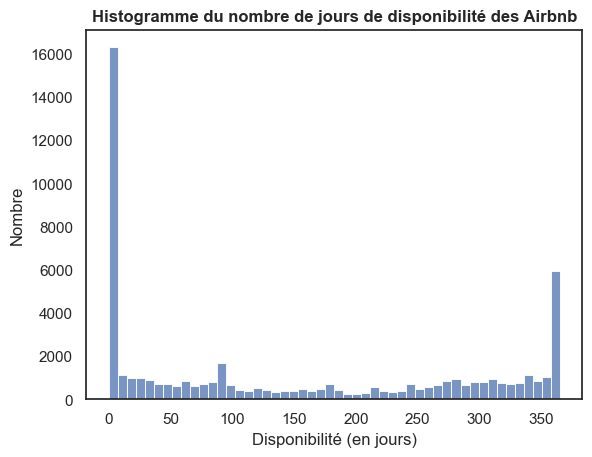

In [28]:
sns.histplot(data=df["Availability 365"],bins=int(50))
plt.title('Histogramme du nombre de jours de disponibilité des Airbnb', weight='bold')
plt.xlabel('Disponibilité (en jours)')
plt.ylabel('Nombre')

In [29]:
a = len(df[df['Availability 365']>300])
b = len(df[df['Availability 365']<60])
c = len(df[df['Availability 365']==0])
a,b,c

(12735, 22373, 14515)

Commentaire : on remarque que près de la moitié des airbnb sont loués moins de 60 jours par an ce qui semble correspondre au concept de base de airbnb c'est à dire louer sa maison ou son appartement quand on est en vacances ou autre pour arrondir ses fins de mois. Cependant, on voit aussi que plus de 12 000 airbnb sont loués plus de 300 jours par an. On voit donc que certaines personnes louent quasiment en continuité leur logement sur Airbnb pour de courtes périodes, alors qu'ils pourraient le louer sur des longues durées. On peut donc supposer qu'il est plus intéressant financièrement de louer son bien sur Aibnb que en agence par exemple (à continuer dans les parties suivantes). 

### 1.3 Influence de la taille du logement

On a vu dans la matrice de corrélation que la "taille" du logement était fortement corrélée au prix ce qui semble logique. On peut faire quelques statistiques descriptives pour avoir un aperçu des différentes tailles de logement. 

NameError: name 'df_feet' is not defined

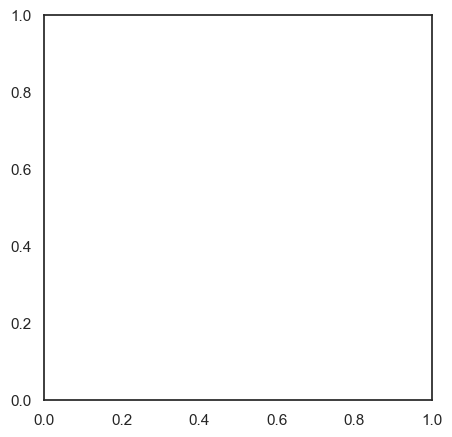

In [30]:
#Répartition du nombres de personnes que peuvent accueillir les Airbnb, pour savoir à quels types de logement on traite
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(df_feet['Accommodates'], bins=int(40))
plt.title ('Nombre de personnes que peut accueillir les airbnb', weight='bold')

Commentaire : en majorité des logements qui peuvent accueillir 2 ou 4 personnes.

In [31]:
#On remplace les valeurs manquantes par des 0
df = df.fillna(0)

In [32]:
#Nouveau data frame uniquement avec les airbnb où le nb de metre carré est renseigné
df_feet = df.loc[(df['Square Feet'] !=0)]
len(df_feet)

1500

In [33]:
df_feet['Square Feet'].describe()

count     1500.000000
mean       543.640667
std        650.643547
min         11.000000
25%        291.000000
50%        431.000000
75%        646.000000
max      15059.000000
Name: Square Feet, dtype: float64

Commentaire : 
- il manque énormément de données sur les mètres carrés, sur plus de 50 000 données à la base, on en a moins que 1500 
- Le maximum de surface est de 15000 square feet ce qui correspond à 1393m2, probablement un erreur de saisie donc on va enlever tous les logements ayant une superficie supérieure à 2500 square feet (soit 232m2).

In [34]:
df_feet = df_feet.loc[(df_feet['Square Feet'] < 2500)]

Text(0, 0.5, 'Surface (en m2)')

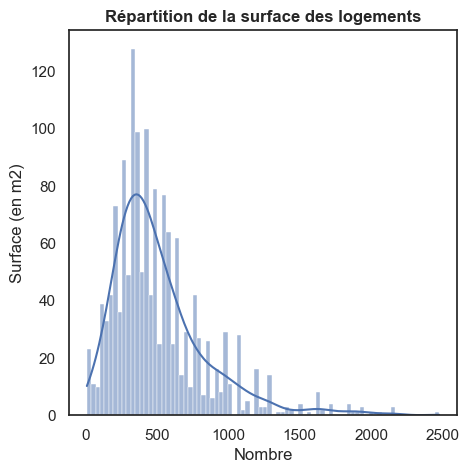

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=df_feet['Square Feet'], kde=True, bins=int(80))
plt.title ('Répartition de la surface des logements', weight='bold')
plt.xlabel('Nombre')
plt.ylabel('Surface (en m2)')

Au vue du nombre très important de données manquantes sur les surfaces des logements, on va désormais s'intéresser au nombre de chambres, de salles de bains, etc ..., qui sont également des bons indicateurs de la taille du logement.


In [37]:
df['Bathrooms'] = df['Bathrooms'].astype(int)

In [38]:
df['Bathrooms'].unique()

array([1, 0, 3, 2, 4, 6, 7, 5, 8])

In [39]:
df['Bedrooms'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  7.,  6., 10.,  8.])

In [40]:
df_bed = df.groupby('Bedrooms').agg({'Bedrooms':'count'})
df_bed.columns = ['count']
df_bed.reset_index(inplace=True)
df_bed.sort_values('count', ascending=False, ignore_index=True, inplace=True)
df_bed

,Bedrooms,count
0,1.0,31955
1,0.0,11213
2,2.0,7861
3,3.0,2096
4,4.0,484
5,5.0,91
6,6.0,21
7,7.0,4
8,10.0,2
9,8.0,1


In [42]:
df_bath = df.groupby('Bathrooms').agg({'Bathrooms':'count'})
df_bath.columns = ['count']
df_bath.reset_index(inplace=True)
df_bath.sort_values('count', ascending=False, ignore_index=True, inplace=True)
df_bath

,Bathrooms,count
0,1,49649
1,2,2914
2,0,721
3,3,308
4,4,59
5,6,30
6,5,22
7,7,13
8,8,12


Commentaire : plus de 11 000 logements n'ont pas de chamnbre, on peut donc en déduire que ce sont des studios. La plus grande majorité des logements ont 1 unique salle de bain. 

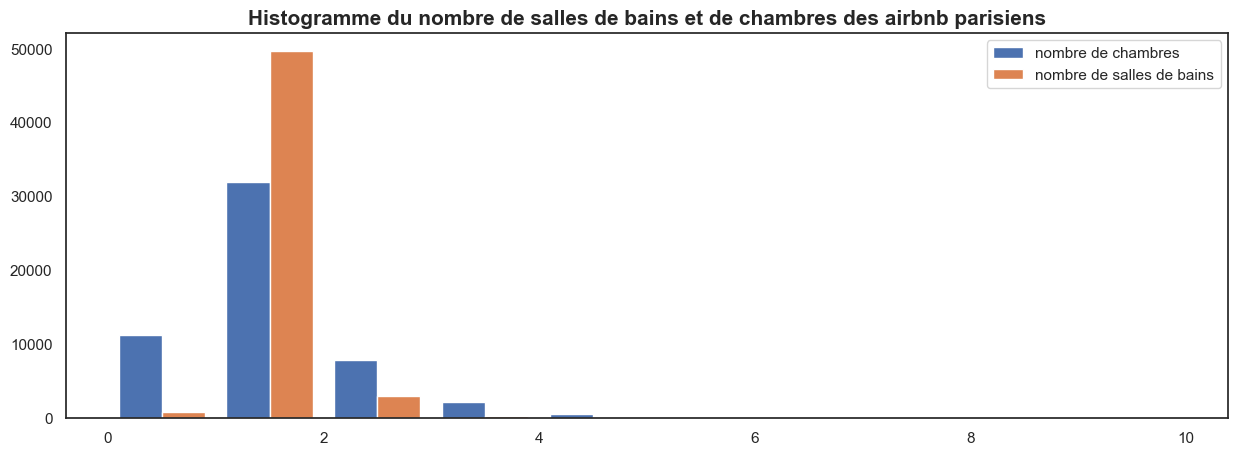

In [43]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.hist([df["Bedrooms"], df["Bathrooms"]], label=['nombre de chambres', 'nombre de salles de bains'], edgecolor = 'white')
plt.title("Histogramme du nombre de salles de bains et de chambres des airbnb parisiens",size=15, weight='bold')
plt.legend()

### 1.4 Les reviews

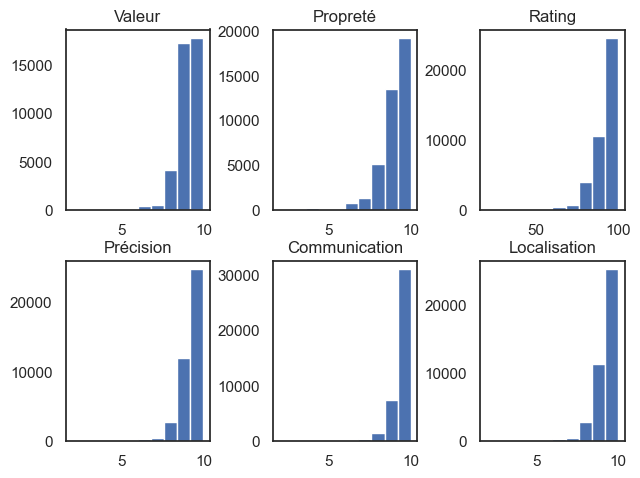

In [44]:

# On regarde la distribution sur les différentes notes données 

fig, ax = plt.subplots(2, 3)
fig.tight_layout()

ax[0, 0].hist(data["Review Scores Value"]) #row=0, col=0
ax[0, 0].set_title('Valeur')
ax[1, 0].hist(data["Review Scores Accuracy"]) #row=1, col=0
ax[1, 0].set_title('Précision')
ax[0, 1].hist(data["Review Scores Cleanliness"]) #row=0, col=1
ax[0, 1].set_title('Propreté')
ax[1, 1].hist(data["Review Scores Communication"]) #row=1, col=1
ax[1, 1].set_title('Communication')
ax[1, 2].hist(data["Review Scores Location"]) #row=1, col=2
ax[1, 2].set_title('Localisation')
ax[0, 2].hist(data["Review Scores Rating"]) #row=2, col=2
ax[0, 2].set_title('Rating')
plt.show()

In [48]:
#On regarde le nombre d'offres qui n'ont pas de description 
data['Description'].isnull().sum()

7

In [49]:
# Si on ne veut pas fausser l'analyse textuelle et avoir un message d'erreur, il faut enlever les lignes qui correspondent à des valeur manquantes 
def transform(lst) :
  return ([i for item in lst for i in item.lower().split()])
full_reviews = transform(data['Description'].fillna(""))

On peut maintenant s'intéresser à la fréquence des mots sur les descriptions d'appartements, dans le but de regarder le lien potentiel avec les prix des Airbnb


In [51]:

# Fréquence de mots

nb_mots = collections.Counter(full_reviews) 

frq_mots = pd.DataFrame(nb_mots.most_common(8),
                             columns=['mots', 'occurences'])

frq_mots.head()


NameError: name 'collections' is not defined

In [ ]:
On obttient un résultat peu étonnant : les mots qui reviennent le plus sont des mots de liaison, des déterminants ou des conjonctions de coordination (« et »). 
Cependant, ces mots ne vont pas nous être utiles pour faire de l'analyse textuelle sur la qualité des descriptions. 
On va donc essayer d'enlever ces « stopwords », via la méthode vue en cours. 

In [ ]:

nltk.download('stopwords')
stop_words = set(stopwords.words([‘french','english']))


In [ ]:
# On ajoute des stop words à la liste initiale, qui était mal configurée 

new_stopwords = ['1', 'one', '2', 'two', 'deux', '3','4','5', '10', '-', ':', ',', 'tout', '!', '.', "d'un", 'rue', 'pied', 'min', 'also', 'Paris', 'paris', 'paris.','paris,', 'parisian', 'place', 'flat', 'floor', 'room', 'bed', 'lit', 'chambre', 'situé', 'logement', 'salle', 'appartement', "l'appartement", 'apartment', 'minutes', 'métro', 'metro', 'studio','kitchen']
new_stopwords_list = stop_words.union(new_stopwords)

print(new_stopwords_list)


In [ ]:

mots_listing = [word for word in full_reviews if word not in new_stopwords_list]
nb_mots_listing = collections.Counter(mots_listing)
nb_mots_listing_df = pd.DataFrame(nb_mots_listing.most_common(33),
                             columns=['words', ‘count'])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

nb_mots_listing_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Mots les plus fréquents")

plt.show()


In [ ]:
# Pour essayer de faire un nuage de mots 


conda install -c conda-forge wordcloud

.